In [3]:
import pandas as pd
from bs4 import BeautifulSoup
import html5lib

In [4]:
df = pd.read_csv('Week 04/Named Entity Recognition/data/imdb.csv',sep=',')

# Web Scraping

<html class="">
 <head>
  <link href="/assets/vendor-8050b2734f17f7a531365ddae17ab643.css" rel="stylesheet"/>
  <link href="/assets/play-5b5748686e48cde6fffda8c16beff232.css" rel="stylesheet"/>
  <!-- TRACEVIEW_HEADER -->
  <meta content="4.0.0.X" name="play/version"/>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <script async="" src="https://sb.scorecardresearch.com/c2/9728626/cs.js" type="text/javascript">
  </script>
  <script async="" src="https://script.crazyegg.com/pages/versioned/common-scripts/11.1.385.js" type="text/javascript">
  </script>
  <script async="" src="https://www.google-analytics.com/gtm/js?id=GTM-5RQS2R6&amp;cid=2145969139.1645801540" type="text/javascript">
  </script>
  <script async="" src="https://www.google-analytics.com/plugins/ua/linkid.js" type="text/javascript">
  </script>
  <script async="" src="https://www.google-analytics.com/analytics.js" type="text/javascript">
  </script>
  <script async="" src="https://scri
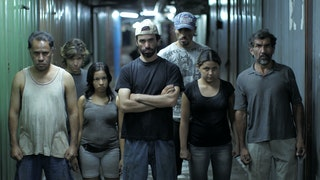
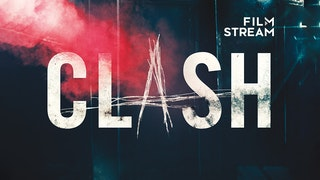
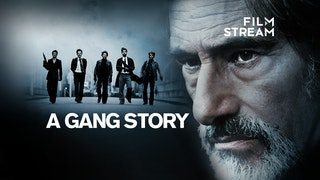
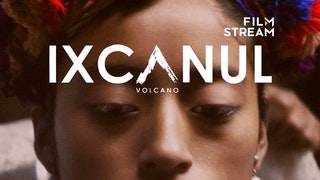
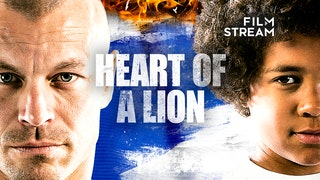
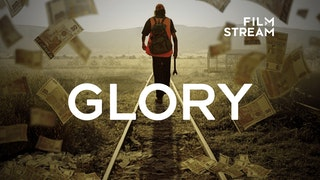
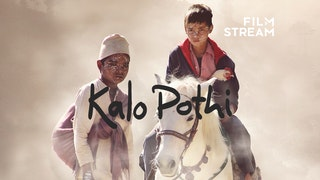
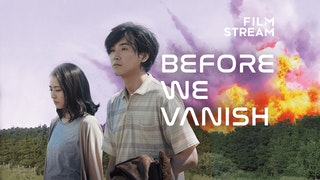
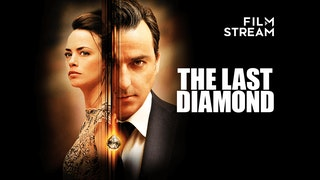

In [15]:
file = open("/Users/xutingxuan/Desktop/MSc ADS/B3_Personalisation media/Assignment 1/TVNZ/movies/7-boxes.html",'r')
soup = BeautifulSoup(file,"html5lib")
print(soup.prettify())

In [25]:
title = soup.find('title').get_text().replace(' | Movie | TVNZ OnDemand', '')
title

'Watch 7 Boxes'

<p data-test-show-hero-description="" class="Hero-description">
            Things get complicated for a teenage delivery boy in Paraguay's infamous Market 4, when he's asked to transport seven boxes with unknown contents. Spanish with English subtitles.
          </p>

## meta data

In [10]:
import glob

# This returns a list of file paths
all_html_file_paths = glob.glob('/Users/xutingxuan/Desktop/MSc ADS/B3_Personalisation media/Assignment 1/TVNZ/movies/*.html')

In [11]:
df_meta = pd.DataFrame()
df_meta['path'] = pd.Series([file for file in all_html_file_paths]) # put path in the df
df_meta

,path
0,/Users/xutingxuan/Desktop/MSc ADS/B3_Personali...
1,/Users/xutingxuan/Desktop/MSc ADS/B3_Personali...
2,/Users/xutingxuan/Desktop/MSc ADS/B3_Personali...
3,/Users/xutingxuan/Desktop/MSc ADS/B3_Personali...
4,/Users/xutingxuan/Desktop/MSc ADS/B3_Personali...
...,...
147,/Users/xutingxuan/Desktop/MSc ADS/B3_Personali...
148,/Users/xutingxuan/Desktop/MSc ADS/B3_Personali...
149,/Users/xutingxuan/Desktop/MSc ADS/B3_Personali...
150,/Users/xutingxuan/Desktop/MSc ADS/B3_Personali...


In [12]:
paths = []
for file in all_html_file_paths:
    paths.append(file)
paths

['/Users/xutingxuan/Desktop/MSc ADS/B3_Personalisation media/Assignment 1/TVNZ/movies/smoke-and-mirrors.html',
 '/Users/xutingxuan/Desktop/MSc ADS/B3_Personalisation media/Assignment 1/TVNZ/movies/dede.html',
 '/Users/xutingxuan/Desktop/MSc ADS/B3_Personalisation media/Assignment 1/TVNZ/movies/the-soul-of-flies.html',
 '/Users/xutingxuan/Desktop/MSc ADS/B3_Personalisation media/Assignment 1/TVNZ/movies/the-unauthorised-melrose-place-story.html',
 '/Users/xutingxuan/Desktop/MSc ADS/B3_Personalisation media/Assignment 1/TVNZ/movies/stolen-by-my-mother-the-kamiyah-mobley-story.html',
 '/Users/xutingxuan/Desktop/MSc ADS/B3_Personalisation media/Assignment 1/TVNZ/movies/circle-of-deception.html',
 '/Users/xutingxuan/Desktop/MSc ADS/B3_Personalisation media/Assignment 1/TVNZ/movies/mammuth.html',
 '/Users/xutingxuan/Desktop/MSc ADS/B3_Personalisation media/Assignment 1/TVNZ/movies/heaven.html',
 '/Users/xutingxuan/Desktop/MSc ADS/B3_Personalisation media/Assignment 1/TVNZ/movies/harry-and-me

In [15]:
titles = []
descs = []
tags = []
imgs = []

for file in paths:
    soup = BeautifulSoup(open(file, 'r'), 'html.parser')
    article = {}

    title = soup.find('meta',  attrs={'name': 'twitter:title'})['content'].replace('Watch ', '').rsplit("|")
    titles.append(title[0])

    desc = soup.find('meta',  attrs={'name': 'twitter:description'})['content']
    descs.append(desc)

    tag = soup.find('meta',  attrs={'name': 'keywords'})['content']
    #words = ['genre:','mood:','channel:','distributor:','branded-vod:']
    #for word in words:
    #    tag = tag.replace(word, ' ')
    tags.append(tag)

    img = soup.find('meta',  attrs={'name': 'twitter:image'})['content']
    imgs.append(img)

    article = {
      'title': titles,
      'description': descs,
      'tag': tags,
      'image': imgs,
      'path': paths
    }

article

{'title': ['Smoke & Mirrors ',
  'Dede ',
  'The Soul of Flies ',
  'The Unauthorised Melrose Place Story ',
  'Stolen By My Mother: The Kamiyah Mobley Story ',
  'Circle of Deception ',
  'Mammuth ',
  'Heaven ',
  'Harry And Meghan: Escaping The Palace ',
  'Escaping the Madhouse: The Nellie Bly Story ',
  'Tasting Menu ',
  'The Pā Boys ',
  'Hunt for the Wilderpeople ',
  'The Most Magnificent Thing ',
  'Zama ',
  'The Light on the Hill ',
  'Dark Angel ',
  'Wrapped Up in Christmas ',
  'Harry and Meghan: A Royal Romance ',
  'Heart of a Lion ',
  'Blue is the Warmest Colour ',
  'Whale Rider ',
  'A Killer Among Us ',
  'The Last Suit ',
  'Border ',
  "Sione's 2: Unfinished Business ",
  'Runaway Millionaires ',
  'I Was Lorena Bobbitt ',
  'One Thousand Ropes ',
  'Park ',
  'Betty and Coretta ',
  'Billionaire Boy ',
  'Once Upon a Time in Venice ',
  'Girl in the Basement ',
  'Sex Life of Plants ',
  'A Love Yarn ',
  'Taken: The Search for Sophie Parker ',
  'In A Flash ',

In [16]:
df = pd.DataFrame(article)
df

,title,description,tag,image,path
0,Smoke & Mirrors,The true story of a man who fooled an entire c...,"genre:drama/crime-thriller,genre:drama,genre:d...",https://play-images-prod-ctf.tech.tvnz.co.nz/a...,/Users/xutingxuan/Desktop/MSc ADS/B3_Personali...
1,Dede,A young woman living in a remote mountain vill...,"genre:drama,genre:drama/foreign-language-subti...",https://play-images-prod-ctf.tech.tvnz.co.nz/a...,/Users/xutingxuan/Desktop/MSc ADS/B3_Personali...
2,The Soul of Flies,A tale of two brothers who meet for the first ...,"genre:movie,genre:drama/foreign-language-subti...",https://play-images-prod-ctf.tech.tvnz.co.nz/a...,/Users/xutingxuan/Desktop/MSc ADS/B3_Personali...
3,The Unauthorised Melrose Place Story,Discover the drama that went on behind the cam...,"genre:movie,genre:closed-captions,genre:drama,...",https://play-images-prod-ctf.tech.tvnz.co.nz/a...,/Users/xutingxuan/Desktop/MSc ADS/B3_Personali...
4,Stolen By My Mother: The Kamiyah Mobley Story,"Based on the true story, an 18-year-old girl f...","genre:movie,genre:drama,genre:drama/real-life-...",https://play-images-prod-ctf.tech.tvnz.co.nz/a...,/Users/xutingxuan/Desktop/MSc ADS/B3_Personali...
...,...,...,...,...,...
147,Gone Mom: The Disappearance of Jennifer Dulos,"Based on the true story of Jennifer Dulos, a w...","genre:movie,genre:drama/real-life-stories,genr...",https://play-images-prod-ctf.tech.tvnz.co.nz/a...,/Users/xutingxuan/Desktop/MSc ADS/B3_Personali...
148,Good Manners,"Clara, a lonely nurse from the outskirts of Sã...","genre:drama/crime-thriller,genre:drama,genre:d...",https://play-images-prod-ctf.tech.tvnz.co.nz/a...,/Users/xutingxuan/Desktop/MSc ADS/B3_Personali...
149,Beaches,"An update to a classic tear-jerker, we witness...","genre:movie,genre:drama,genre:closed-captions,...",https://play-images-prod-ctf.tech.tvnz.co.nz/a...,/Users/xutingxuan/Desktop/MSc ADS/B3_Personali...
150,Resolve,"Based on the true story of Chris Crean, who to...","genre:movie,genre:drama,genre:drama/real-life-...",https://play-images-prod-ctf.tech.tvnz.co.nz/a...,/Users/xutingxuan/Desktop/MSc ADS/B3_Personali...


In [17]:
df.to_csv('TVNZ_meta_v2.csv', index=True, sep=';')